# Introduction to NetCDF Files

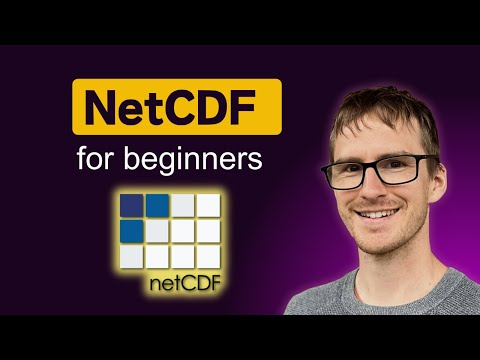

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('FGHJhAFf1W0', width=800, height=450)

NetCDF (Network Common Data Form) is not just a file format. NetCDF is a collection of software libraries and platform-independent data formats designed to facilitate the creation, access, and sharing of array-based scientific data with any number of dimensions.

The project began in 1988, based on the Common Data Format developed by NASA. While the Common Data Format has a focus on space science applications, NetCDF is designed to be considerate of the broad *network* of scientific data. NetCDF files were initially developed to facilitate the open sharing of atmospheric data, which was an important step in advancing weather forecasting and climate models. However, NetCDF is now widely used an supported across a range of scientific discplines, including (not by no means limited to):

* Meteorological data: such as temperature, pressure, and humidity measured at different altitudes and times.
* Oceanographic data: such as sea temperature, salinity, or the concentration of chlorophyll a or different nutrients.
* Climate model outputs: which often consist of multi-dimensional data arrays representing various environmental parameters over time.
* Remote sensing data: from satellites, which can include multi-band images and derived products like vegetation indices.
* Environmental science: for storing and analysing data related to air quality, hydrology, and soil moisture.

There is an ongoing effort to promote the use of NetCDF files across more disciplines – a movement quickly gaining traction. NetCDF files are suitable for any array-oriented scientific data with any number of dimensions. Using the same data format across multiple disciplines facilitates cross-disciplinary collaboration; scientists from different fields can more easily access and understand each other's data without being impeded by unfamiliar formats. Using fewer data formats also promotes machine interoperability. Visualisation, monitoring services, data aggregation and the  development of wizards to help people create files or extract data can be use more broadly, therefore greatly reducing the amount of work needed to create and maintain such services.

The project home page is hosted by the Unidata program at the University Corporation for Atmospheric Research (UCAR).
https://www.unidata.ucar.edu/software/netcdf/

## Why NetCDF?

NetCDF files offer several advantages for scientific data storage and dissemination. They are designed to store large amounts of data in a compact and efficient way, making them ideal for handling the vast datasets typical in scientific research. 

NetCDF files are

![Characteristics of a NetCDF file](Images/netcdf_features.png)

## Example of a NetCDF file

To better understand how a NetCDF file is structured, let's consider a simple example. Below is a snippet of a dummy NetCDF file. Keep in mind, this example is created just for this explanation—it's not real data and is intentionally simple!

```
dimensions:
	time = 2 ;
	longitude = 4 ;
	latitude = 3 ;
variables:
	int time(time) ;
		time:units = "days since 2020-07-06" ;
	float latitude(latitude) ;
		latitude:units = "degrees_north" ;
	float longitude(longitude) ;
		longitude:units = "degrees_east" ;
	float temperature(time, lat, lon) ;
        temperature:_FillValue = 1.e9f ;
		temperature:units = "degrees Celsius" ;
		temperature:long_name = "Surface sea water temperature" ;

// global attributes:
		:title = "Global Surface Temperature Data" ;
		:institution = "University Centre in Svalbard" ;
		:source = "Observational Data from Arctic Research Station" ;
		:history = "Created 2024-07-08T09:55:36.673269" ;
}
```

![Example of a NetCDF file](Images/netcdf_diagram.png)

A classic NetCDF file like this one can be broken down into 3 components - dimensions, variables and attributes.

### Dimensions

Dimensions specify the size of data arrays. For instance, the `time` dimension with a value of 2 indicates that a variable using this dimension spans 2 points in time. However, it's important to note that the `time` dimension itself does not provide information on specific times that have been sampled.

### Variables

Let's break down the syntax first. `int time(time)` means that the data are integers, the name of the variable is time, and it has one dimension (in brackets) also called `time` - referring to the dimension above.

Variables can be broken down into coordinate variables and data variables. Coordinate variables are 1D, and it is not uncommon for the coordinate variables to have the same name as their respective dimension. Data variables can have any number of dimensions - e.g. `float temperature(time, lat, lon)` above. This `temperature` variable is a 3D array of floating-point numbers (numbers with decimal digits). 

### Attributes

Attributes are metadata that can be broken down into global attributes and variable attributes. 

Variable attributes describe the variable (e.g. units, a description for the variable). There is a special variable attribute `_FillValue` that denotes the value used in the data to denote missing or undefined values - for example, sea surface temperatures over land. Applications that read the data file can use this to know how to represent these values.

Global attributes describe the dataset as a whole. In this example, they include title, institution, and source.

### Is this example compliant with the FAIR principles?

In short, no! 

The data creator is free to define custom attributes. In this case, you might be able to understand each attribute, you might not. If 10 people were asked to write the same dataset to a NetCDF file, would they allm use the same set of attributes? Would they all all populate their attributes in the same way? Would they all use the same name for their variables? Most likely, they would create 10 completely unique files, and you might not be able to understand all of them.

For NetCDF files to be fully compliant with the FAIR principles, they should adhere to specific conventions. These conventions should describe, with a few degrees of freedom as possible;
* How to structure the data within a NetCDF file
* Which variable and global attributes should be included and how to populate them

These conventions should be documented clearly online. It should be mentioned within the file which conventions have been adhered to, and which version. 

## FAIR-compliant netCDF files

To be fully compliant with the FAIR principles, NetCDF files should adhere to the Climate & Forecast (CF) conventions and the Attribute Convention for Data Discovery (ACDD). These conventions provide standardised guidelines that ensure consistency between files, which is crucial for interoperability across different software tools and disciplines that utilise NetCDF files.

By following these conventions, both the data creator and user, whether human or machine, should be able to understand the data in the same way. A NetCDF file itself is not necessarily FAIR because you could include any attributes or structure your data however you like. However, a CF-NetCDF file is FAIR-compliant.

### CF conventions

The CF conventions are a set of standards that define how a NetCDF file should be structured. They also provide some terms that can be used as variable or global attributes. 
https://cfconventions.org/

Their online documentation is extensive and provides standardised ways to organise many different types of data. You don’t need to read it all, but the documentation is a useful resource if you want to know how to structure or understand a CF-NetCDF file. Included are numerous examples of how certain aspects of a NetCDF file should be encoded in various specific scenarios.

Particularly noteworthy is the CF standard names controlled vocabulary.
https://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html

This is a collection of variable names with descriptions that the data creator and user can read. Each variable in a CF-NetCDF file should include a `standard_name` variable attribute populated with one of these terms. Canonical units are also provided in the table, but the data can be archived with different units as long as they are physically equivalent to the canonical units. 

### ACDD conventions

The ACDD conventions focus on enhancing the discoverability of NetCDF files. They mainly provide a set of recommendations for global attributes that should be included in a CF-NetCDF file (e.g. where and when the data were collected/created, by whom, some keywords), but also a few variable attributes. By including ACDD metadata, NetCDF files become more searchable and accessible through data catalogues and repositories.
https://wiki.esipfed.org/Attribute_Convention_for_Data_Discovery_1-3

### Validating compliance

There are also validators you can use to ensure that your files are compliant with the CF and ACDD conventions before you publish them. For example:
https://compliance.ioos.us/index.html
https://sios-svalbard.org/dataset_validation/form (need a SIOS account)

## Example of a CF-NetCDF file

Below is an example of a CF-NetCDF file of global sea ice concentration data.

The file is structured with the dimensions `time` (unlimited and currently holds one value), `nv` (2 values), and `xc` and `yc` (both with 864 values representing the x and y coordinates in the projection, respectively).

There is a variable that defines the projection; in this case the *Lambert Azimuthal Equal Area* projection, crucial for accurately mapping the data onto a geographic grid.

`time`, `xc`, `yc` are 1D coordinate variables, whilst `lat` and `lon` are 2D arrays - the geographic coordinates are provided for every point in the 2D x,y grid. The primary data variable `ice_conc` represents the fully filtered concentration of sea ice and includes attributes that are defined within the CF conventions documentation at https://cfconventions.org/Data/cf-conventions/cf-conventions-1.7/cf-conventions.html#attribute-appendix. 

Extensive global attributes provide essential metadata about the dataset. Particularly important is that the `Conventions` attribute states that the file is compliant with CF-1.7 and ACDD-1.3.


```
netcdf classic {
dimensions:
	time = UNLIMITED ; // (1 currently)
	nv = 2 ;
	xc = 864 ;
	yc = 864 ;
variables:
	NC_INT Lambert_Azimuthal_Grid ;
		NC_CHAR Lambert_Azimuthal_Grid:grid_mapping_name = "lambert_azimuthal_equal_area" ;
		NC_DOUBLE Lambert_Azimuthal_Grid:longitude_of_projection_origin = 0 ;
		NC_DOUBLE Lambert_Azimuthal_Grid:latitude_of_projection_origin = 90 ;
		NC_DOUBLE Lambert_Azimuthal_Grid:false_easting = 0 ;
		NC_DOUBLE Lambert_Azimuthal_Grid:false_northing = 0 ;
		NC_DOUBLE Lambert_Azimuthal_Grid:semi_major_axis = 6378137 ;
		NC_DOUBLE Lambert_Azimuthal_Grid:inverse_flattening = 298.257223563 ;
		NC_CHAR Lambert_Azimuthal_Grid:proj4_string = "+proj=laea +lon_0=0 +datum=WGS84 +ellps=WGS84 +lat_0=90.0" ;
	NC_DOUBLE time(time) ;
		NC_CHAR time:units = "seconds since 1978-01-01 00:00:00" ;
		NC_CHAR time:long_name = "reference time of product" ;
		NC_CHAR time:standard_name = "time" ;
		NC_CHAR time:axis = "T" ;
		NC_CHAR time:calendar = "standard" ;
		NC_CHAR time:bounds = "time_bnds" ;
		NC_INT time:_ChunkSizes = 512 ;
	NC_DOUBLE time_bnds(nv, time) ;
		NC_INT time_bnds:_ChunkSizes = 1, 2 ;
	NC_DOUBLE xc(xc) ;
		NC_CHAR xc:units = "km" ;
		NC_CHAR xc:long_name = "x coordinate of projection (eastings)" ;
		NC_CHAR xc:standard_name = "projection_x_coordinate" ;
		NC_INT xc:_ChunkSizes = 864 ;
	NC_DOUBLE yc(yc) ;
		NC_CHAR yc:units = "km" ;
		NC_CHAR yc:long_name = "y coordinate of projection (northings)" ;
		NC_CHAR yc:standard_name = "projection_y_coordinate" ;
		NC_INT yc:_ChunkSizes = 864 ;
	NC_FLOAT lat(xc, yc) ;
		NC_CHAR lat:units = "degrees_north" ;
		NC_CHAR lat:long_name = "latitude coordinate" ;
		NC_CHAR lat:standard_name = "latitude" ;
		NC_INT lat:_ChunkSizes = 864, 864 ;
	NC_FLOAT lon(xc, yc) ;
		NC_CHAR lon:units = "degrees_east" ;
		NC_CHAR lon:long_name = "longitude coordinate" ;
		NC_CHAR lon:standard_name = "longitude" ;
		NC_INT lon:_ChunkSizes = 864, 864 ;
	NC_INT ice_conc(xc, yc, time) ;
		NC_INT ice_conc:_FillValue = -32767 ;
		NC_CHAR ice_conc:long_name = "fully filtered concentration of sea ice using atmospheric correction of brightness temperatures and open water filters" ;
		NC_CHAR ice_conc:standard_name = "sea_ice_area_fraction" ;
		NC_CHAR ice_conc:units = "%" ;
		NC_INT ice_conc:valid_min = 0 ;
		NC_INT ice_conc:valid_max = 10000 ;
		NC_CHAR ice_conc:grid_mapping = "Lambert_Azimuthal_Grid" ;
		NC_CHAR ice_conc:ancillary_variables = "total_standard_uncertainty status_flag" ;
		NC_DOUBLE ice_conc:scale_factor = 0.01 ;
		NC_CHAR ice_conc:comment = "this field is the primary sea ice concentration estimate for this climate data record" ;
		NC_CHAR ice_conc:coordinates = "time lat lon" ;
		NC_INT ice_conc:_ChunkSizes = 1, 864, 864 ;
	NC_INT raw_ice_conc_values(xc, yc, time) ;
		NC_INT raw_ice_conc_values:_FillValue = -32767 ;
		NC_CHAR raw_ice_conc_values:long_name = "sea ice concentration estimates as retrieved by the algorithm, and that were edited away by the various filters" ;
		NC_CHAR raw_ice_conc_values:units = "%" ;
		NC_CHAR raw_ice_conc_values:grid_mapping = "Lambert_Azimuthal_Grid" ;
		NC_DOUBLE raw_ice_conc_values:scale_factor = 0.01 ;
		NC_CHAR raw_ice_conc_values:comment = "this field can be used in combination with 'ice_conc' to access un-bounded normal distribution of sea ice concentration estimates corresponding to the uncertainty estimate in 'total_standard_uncertainty'. It does also feature some amount of un-physical data (below 0% and above 100%)." ;
		NC_CHAR raw_ice_conc_values:coordinates = "time lat lon" ;
		NC_INT raw_ice_conc_values:_ChunkSizes = 1, 864, 864 ;
	NC_INT total_standard_uncertainty(xc, yc, time) ;
		NC_INT total_standard_uncertainty:_FillValue = -32767 ;
		NC_CHAR total_standard_uncertainty:long_name = "total uncertainty (one standard deviation) of concentration of sea ice" ;
		NC_CHAR total_standard_uncertainty:standard_name = "sea_ice_area_fraction standard_error" ;
		NC_CHAR total_standard_uncertainty:units = "%" ;
		NC_CHAR total_standard_uncertainty:grid_mapping = "Lambert_Azimuthal_Grid" ;
		NC_DOUBLE total_standard_uncertainty:scale_factor = 0.01 ;
		NC_CHAR total_standard_uncertainty:coordinates = "time lat lon" ;
		NC_INT total_standard_uncertainty:_ChunkSizes = 1, 864, 864 ;
	NC_INT smearing_standard_uncertainty(xc, yc, time) ;
		NC_INT smearing_standard_uncertainty:_FillValue = -32767 ;
		NC_CHAR smearing_standard_uncertainty:long_name = "smearing uncertainty (one standard deviation) of concentration of sea ice" ;
		NC_CHAR smearing_standard_uncertainty:units = "%" ;
		NC_CHAR smearing_standard_uncertainty:grid_mapping = "Lambert_Azimuthal_Grid" ;
		NC_DOUBLE smearing_standard_uncertainty:scale_factor = 0.01 ;
		NC_CHAR smearing_standard_uncertainty:comment = "this is one of the two components contributing to 'total_standard_uncertainty'" ;
		NC_CHAR smearing_standard_uncertainty:coordinates = "time lat lon" ;
		NC_INT smearing_standard_uncertainty:_ChunkSizes = 1, 864, 864 ;
	NC_INT algorithm_standard_uncertainty(xc, yc, time) ;
		NC_INT algorithm_standard_uncertainty:_FillValue = -32767 ;
		NC_CHAR algorithm_standard_uncertainty:long_name = "algorithm uncertainty (one standard deviation) of concentration of sea ice" ;
		NC_CHAR algorithm_standard_uncertainty:units = "%" ;
		NC_CHAR algorithm_standard_uncertainty:grid_mapping = "Lambert_Azimuthal_Grid" ;
		NC_DOUBLE algorithm_standard_uncertainty:scale_factor = 0.01 ;
		NC_CHAR algorithm_standard_uncertainty:comment = "this is one of the two components contributing to 'total_standard_uncertainty'" ;
		NC_CHAR algorithm_standard_uncertainty:coordinates = "time lat lon" ;
		NC_INT algorithm_standard_uncertainty:_ChunkSizes = 1, 864, 864 ;
	NC_SHORT status_flag(xc, yc, time) ;
		NC_SHORT status_flag:_FillValue = -32768 ;
		NC_CHAR status_flag:long_name = "status flag bit array for sea ice concentration retrievals" ;
		NC_CHAR status_flag:standard_name = "sea_ice_area_fraction status_flag" ;
		NC_SHORT status_flag:valid_min = 0 ;
		NC_SHORT status_flag:valid_max = 32767 ;
		NC_CHAR status_flag:grid_mapping = "Lambert_Azimuthal_Grid" ;
		NC_SHORT status_flag:flag_masks = 1, 2, 4, 8, 16, 32, 64, 128 ;
		NC_CHAR status_flag:flag_meanings = "land lake open_water_filtered land_spill_over high_t2m spatial_interp temporal_interp max_ice_climo" ;
		NC_CHAR status_flag:flag_descriptions = "
all bits to 0 (flag 0): Nominal retrieval by the SIC algorithm
bit 1 (flag 1): Position is over land
bit 2 (flag 2): Position is lake
bit 3 (flag 4): SIC is set to zero by the open water filter
bit 4 (flag 8): SIC value is changed for correcting land spill-over effects
bit 5 (flag 16): Handle with caution, the 2m air temperature is high at this position, and this might be false ice
bit 6 (flag 32): Value is the result of spatial interpolation
bit 7 (flag 64): Value is the result of temporal interpolation
bit 8 (flag 128): SIC is set to zero since position is outside maximum sea ice climatology." ;
		NC_CHAR status_flag:comment = "Flag values found in the map might be combinations of those listed above. For example flag value 80 (= 2^4 + 2^6 = 16 + 64) indicates high_t2m AND temporal_interp" ;
		NC_CHAR status_flag:coordinates = "time lat lon" ;
		NC_INT status_flag:_ChunkSizes = 1, 864, 864 ;

// global attributes:
		NC_CHAR :title = "High(er) Resolution Sea Ice Concentration Climate Data Record Version 3 (SSM/I and SSMIS) from the ESA CCI+" ;
		NC_CHAR :summary = "This climate data record of sea ice concentration is obtained from passive microwave satellite data (SSM/I and SSMIS) over the polar regions (Arctic and Antarctic). The processing chain features: 1) dynamic tuning of tie-points and algorithms,  2) correction of atmospheric noise using a Radiative Transfer Model,  3) computation of per-pixel uncertainties, 4) an optimal hybrid sea ice concentration algorithm, and 5) pan-sharpening of the SIC fields using the near-90GHz imagery channels. This dataset was generated by the ESA Climate Change Initiative (CCI+) Sea Ice Phase 1 project. This dataset is an enhanced-resolution version of the OSI SAF OSI-450-a CDR over the period 1991-2020." ;
		NC_CHAR :topiccategory = "Oceans ClimatologyMeteorologyAtmosphere" ;
		NC_CHAR :keywords = "GCMDSK:Earth Science > Cryosphere > Sea Ice > Sea Ice Concentration, GCMDSK:Earth Science > Oceans > Sea Ice > Sea Ice Concentration, GCMDSK:Earth Science > Climate Indicators > Cryospheric Indicators > Sea Ice Concentration, GCMDLOC:Geographic Region > Northern Hemisphere, GCMDLOC:Vertical Location > Sea Surface, GCMDPROV: Government Agencies-non-US > Norway > NO/MET > Norwegian Meteorological Institute" ;
		NC_CHAR :keywords_vocabulary = "GCMDSK:GCMD Science Keywords:https://gcmd.earthdata.nasa.gov/kms/concepts/concept_scheme/sciencekeywords, GCMDPROV:GCMD Providers:https://gcmd.earthdata.nasa.gov/kms/concepts/concept_scheme/providers, GCMDLOC:GCMD Locations:https://gcmd.earthdata.nasa.gov/kms/concepts/concept_scheme/locations" ;
		NC_DOUBLE :geospatial_lat_min = 16.62393 ;
		NC_DOUBLE :geospatial_lat_max = 90 ;
		NC_DOUBLE :geospatial_lon_min = -180 ;
		NC_DOUBLE :geospatial_lon_max = 180 ;
		NC_DOUBLE :geospatial_vertical_min = 0 ;
		NC_DOUBLE :geospatial_vertical_max = 0 ;
		NC_CHAR :sensor = "SSM/I,SSMIS" ;
		NC_CHAR :platform = "DMSP-F<10,11,13,14,15>,DMSP-F<16,17,18>" ;
		NC_CHAR :source = "FCDR of SMMR / SSMI / SSMIS Brightness Temperatures R4 from EUMETSAT Climate Monitoring SAF (doi:10.5676/EUM_SAF_CM/FCDR_MWI/V004), ERA5" ;
		NC_CHAR :time_coverage_start = "2007-09-15T00:00:00Z" ;
		NC_CHAR :time_coverage_end = "2007-09-16T00:00:00Z" ;
		NC_CHAR :time_coverage_duration = "P1D" ;
		NC_CHAR :time_coverage_resolution = "P1D" ;
		NC_CHAR :project = "Climate Change Initiative - European Space Agency" ;
		NC_CHAR :institution = "Norwegian Meteorological Institute" ;
		NC_CHAR :creator_name = "Norwegian Meteorological Institute" ;
		NC_CHAR :creator_type = "institution" ;
		NC_CHAR :creator_url = "http://met.no" ;
		NC_CHAR :creator_email = "forskning@met.no" ;
		NC_CHAR :license = "Free and open access" ;
		NC_CHAR :references = "A Product User Guide (PUG), an Algorithm Theoretical Basis Document (ATBD) and a Validation Report (PVASR) are available from the doi landing page and from https://climate.esa.int/seaice" ;
		NC_CHAR :history = "2023-04-20T21:46:46Z creation" ;
		NC_CHAR :date_created = "2023-04-20" ;
		NC_CHAR :cdm_data_type = "Grid" ;
		NC_CHAR :spatial_resolution = "12.5 km grid spacing" ;
		NC_CHAR :algorithm = "reSICCI3LF: SIC from 19/37GHz channels, pan-sharpened with SIC from near-90GHz channels." ;
		NC_CHAR :geospatial_bounds_crs = "EPSG:6931" ;
		NC_CHAR :contributor_name = "Thomas Lavergne,Atle Soerensen,Rasmus Tonboe,Matilde Kreiner,Roberto Saldo,Anton Birkedal,Fabrizio Baordo,Trygve Aspenes,Steinar Eastwood" ;
		NC_CHAR :contributor_role = "PrincipalInvestigator,author,author,author,author,author,author,author,author" ;
		NC_CHAR :product_version = "3.0" ;
		NC_CHAR :tracking_id = "0a5f4360-8c19-40aa-a09a-bab17eb0b6fc" ;
		NC_CHAR :naming_authority = "NERC EDS Centre for Environmental Data Analysis" ;
		NC_CHAR :Conventions = "CF-1.7,ACDD-1.3" ;
		NC_CHAR :standard_name_vocabulary = "CF Standard Name Table (Version 80, 07 February 2023)" ;
		NC_CHAR :product_name = "cci_HRssmi_sea_ice_conc_climate_data_record" ;
		NC_CHAR :id = "10.5285/eade27004395466aaa006135e1b2ad1a" ;
		NC_CHAR :format_version = "CCI Data Standards v2.3" ;
		NC_CHAR :key_variables = "ice_conc" ;
		NC_CHAR :DODS_EXTRA.Unlimited_Dimension = "time" ;
}
```

If you use these data, please cite them as recommended below:

Lavergne, T.; Sørensen, A.; Tonboe, R.T.; Kreiner, M.; Saldo, R.; Birkedal, A.; Baordo, F.; Aspenes, T.; Eastwood, S. (2023): ESA Sea Ice Climate Change Initiative (Sea_Ice_cci): High(er) Resolution Sea Ice Concentration Climate Data Record Version 3 (SSM/I and SSMIS). NERC EDS Centre for Environmental Data Analysis, 17 May 2023. doi:10.5285/eade27004395466aaa006135e1b2ad1a. https://dx.doi.org/10.5285/eade27004395466aaa006135e1b2ad1a